In [79]:
#!/usr/bin/python
import spidev
#import RPi.GPIO as GPIO
import time
import numpy as np
import matplotlib 
from scipy import signal
import matplotlib.pyplot as plt
import json
import time
from pyUn0 import *
from scipy import fftpack

Data acquired


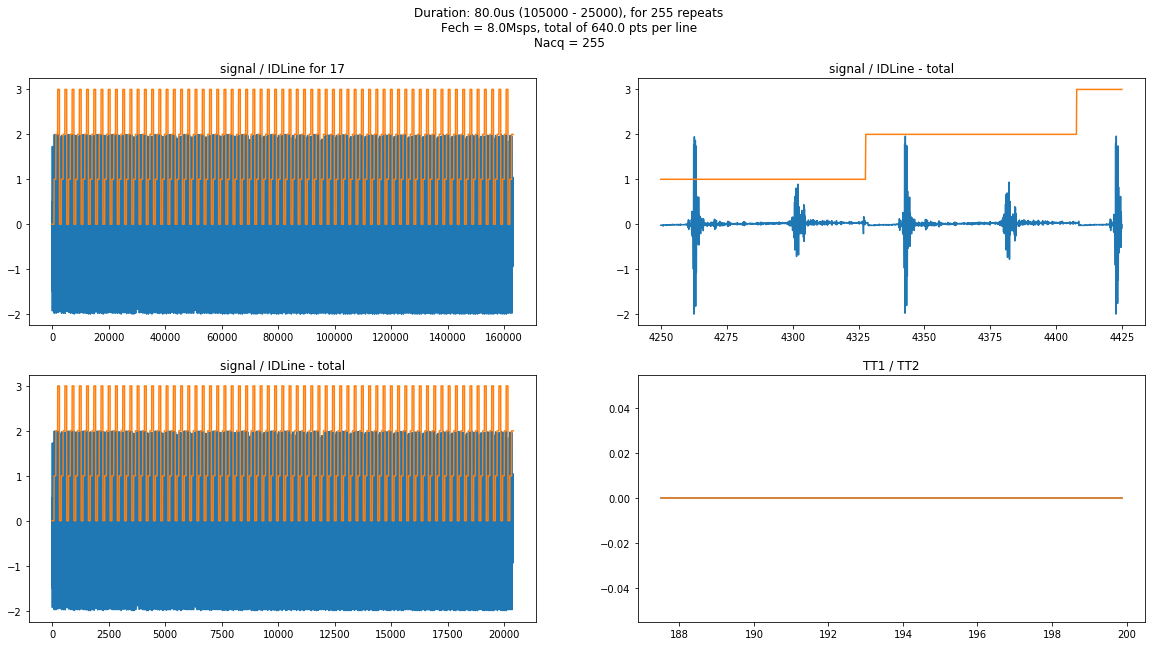

In [84]:
for FILE in ["data/20180813a-17.json"]:
    x = us_json()
    x.JSONprocessing(FILE)
    # row and column sharing
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(20,10))
    Duration = (x.parameters['LengthAcq']-x.parameters['DeltaAcq'])/1000.0
    Title = "Duration: "+str(Duration)+"us ("+str(x.parameters['LengthAcq'])+" - "
    Title+= str(x.parameters['DeltaAcq'])+"), for "+str(x.Nacq)
    Title += " repeats\n"
    Title += "Fech = "+str(x.f)+"Msps, total of "+str(float(x.f)*Duration)+" pts per line\n" 
    Title += "Nacq = "+str(x.Nacq)
    plt.suptitle(Title)
    #plt.figure()
    A = 4000
    B = 6000
    ax1.plot(x.tmp)
    ax1.plot(x.IDLine)
    ax1.set_title('signal / IDLine for '+str(x.N))
    A =34000
    ax2.plot(x.t[A:A+1400],x.tmp[A:A+1400])
    ax2.plot(x.t[A:A+1400],x.IDLine[A:A+1400])
    ax2.set_title('signal / IDLine - total')
    ax3.plot(x.t,x.tmp)
    ax3.plot(x.t,x.IDLine)
    ax3.set_title('signal / IDLine - total')
    ax4.plot(x.t[1500:1600],x.TT1[1500:1600])
    ax4.plot(x.t[1500:1600],x.TT2[1500:1600])
    ax4.set_title('TT1 / TT2')
    plt.show()
    #plt.tight_layout()
    FileName = "images/"+x.iD+"-"+str(x.N)+"-all.jpg"
    f.savefig(FileName)

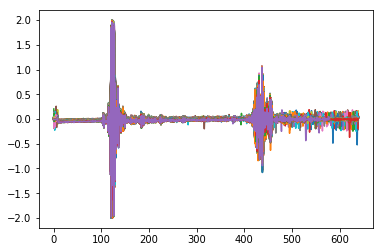

In [90]:
for k in range(255):
    n = 0
    A = (n-1+k)*640+13500
    B = (n+k)*640+13500
    plt.plot(x.tmp[A:B])
plt.show()

In [66]:
x.f

8.0

In [67]:
x.timings

{u'Fech': 8.0,
 u'LAcq': 80,
 u'NAcq': 384000,
 u'NLines': 600,
 u't1': 200,
 u't2': 100,
 u't3': 2000,
 u't4': 25000,
 u't5': 105000}

In [78]:
ID = []
Counter = 0
ps = 0
PS = []
L = []
for i in range(len(x.tmp)-2):
    if i < len(x.tmp) - 50:
        if (x.IDLine[i] ==  x.IDLine[i+1]) and  (x.IDLine[i] <> x.IDLine[i+2]):
            if (i - ps) > 100:
                L.append(i-ps)
                print Counter,i,L[-1],x.t[i]*1.0/(1+Counter)
                Counter = Counter + 1
                ps = i
                PS.append(i)
        else:
            ID.append(Counter)
    else:
        ID.append(-1)
        
del PS[0]
del ID[0]
del L[0]

0 700 700 87.5
1 1340 640 83.75
2 1980 640 82.5
3 2619 639 81.84375
4 3260 641 81.5
5 3900 640 81.25
6 4540 640 81.0714285714
7 5180 640 80.9375
8 5820 640 80.8333333333
9 6460 640 80.75
10 7100 640 80.6818181818
11 7740 640 80.625
12 8380 640 80.5769230769
13 9020 640 80.5357142857
14 9660 640 80.5
15 10300 640 80.46875
16 10940 640 80.4411764706
17 11580 640 80.4166666667
18 12220 640 80.3947368421
19 12860 640 80.375
20 13500 640 80.3571428571
21 14140 640 80.3409090909
22 14780 640 80.3260869565
23 15420 640 80.3125
24 16060 640 80.3
25 16700 640 80.2884615385
26 17340 640 80.2777777778
27 17979 639 80.2633928571
28 18620 641 80.2586206897
29 19260 640 80.25
30 19900 640 80.2419354839
31 20540 640 80.234375
32 21180 640 80.2272727273
33 21820 640 80.2205882353
34 22460 640 80.2142857143
35 23099 639 80.2048611111
36 23740 641 80.2027027027
37 24380 640 80.1973684211
38 25020 640 80.1923076923
39 25660 640 80.1875
40 26300 640 80.1829268293
41 26940 640 80.1785714286
42 27580 640 80

In [28]:
39*1.28

49.92

In [28]:
479/1.28

374.21875

In [4]:
45*8

360

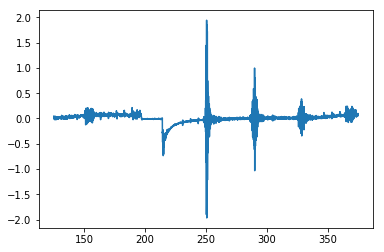

In [18]:
plt.plot(x.t[2000:6000],x.tmp[2000:6000])
plt.show()